<a href="https://colab.research.google.com/github/Untick/Selector_ObjDet/blob/Trokhachev-Anton-folder/%D0%A2%D1%80%D0%BE%D1%85%D0%B0%D1%87%D0%B5%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD_CVAE_RGB_%2B_%D1%81%D0%BE%D1%85%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0_%D1%87%D0%B0%D1%81%D1%82%D1%8F%D0%BC%D0%B8_%D0%BD%D0%B0_%D0%B4%D0%B8%D1%81%D0%BA_%D1%81_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%2B_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%BE%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B9_%D0%BF%D0%B0%D0%BC%D1%8F%D1%82%D0%B8_%2B_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA_%D0%BF%D0%BE%D1%85%D0%BE%D0%B6%D0%B8%D1%85_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BD%D0%B0_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%BC_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Lambda, LeakyReLU

# Оптимизаторы для обучения модели
from tensorflow.keras.optimizers import Adam

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Загрузка сохраненной модели
from tensorflow.keras.models import load_model

# класс для использования Functional API
from tensorflow.keras import Model

# Отрисовка изображения
from tensorflow.keras.preprocessing import image

# Импортируем Keras
from tensorflow import keras

# Импортируем Keras
import keras

# Подключим модуль вычислений на Keras
import keras.backend as K

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split 

# Функция среднеквадратической ошибки для расчетов вручную
from sklearn.metrics import mean_squared_error

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Работа с таблицами
import pandas as pd

from PIL import Image
import cv2

# Отрисовка графиков
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_Selector_newbies/datasets/processed%20extended%20dataset%203.zip', None, quiet=True)

'processed%20extended%20dataset%203.zip'

In [3]:
!unzip -qq -o processed%20extended%20dataset%203.zip -d dataset/

In [4]:
IMG_WIDTH = 244
IMG_HEIGHT = 244
CHANELS = 3
num_classes = 12

In [5]:
import re

path = 'dataset/processed extended dataset 3' #>>>прописать путь до каталога с каталогами одежды
path_to = 'dataset_new3'

pattern = '.*(?=\.)'
dir_list = os.listdir(path)
if not os.path.isdir(path_to):
     os.mkdir(path_to)
for i in dir_list:
    if not os.path.isdir(f'{path_to}/{i}'):
        os.mkdir(f'{path_to}/{i}')
    fl = os.listdir(f'{path}/{i}')
    for i2 in fl:   #>>>Если нужна неполная версия датасета, заменяем на fl[:50] для 50 файлов в каждом каталоге
        fn = re.match(pattern, i2)
        img = f'{path}/{i}/{i2}'
        try:
            im = Image.open(img).convert("RGB")
        except:
            print(f'При обработке файла {i}/{i2} произошла ошибка. Файл не читается.')
            pass
        if not os.path.isfile(f'{path_to}/{i}/{fn.group(0)}.jpg'):
            im.save(f'{path_to}/{i}/{fn.group(0)}.jpg', 'jpeg')
        else:
            im.save(f'{path_to}/{i}/{fn.group(0)}ren545.jpg', 'jpeg')
        im.close()
        os.remove(f'{path}/{i}/{i2}')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
IMG_WIDTH = 244
IMG_HEIGHT = 244
CHANELS = 3
num_classes = 12

FILE_DIR  = 'dataset_new3'
dir_list = os.listdir(FILE_DIR)
CLASS_LIST = sorted(os.listdir(FILE_DIR))
CLASS_COUNT = len(CLASS_LIST)

image_array = []
data_labels = []
class_label = 0
patch_list = []

FILE_DIR  = 'dataset_new3'
dir_list = os.listdir(FILE_DIR)

raz = 0
maxraz = 16
start = 0
end = 50

while raz < maxraz:
    image_array = []
    data_labels = []
    class_label = 0
    for i in dir_list:
        file_list = os.listdir(f'dataset_new3/{i}')
        ch = 0
        dl = len(file_list)
        for image in file_list[start:end]:
            try:
                img = Image.open(f'dataset_new3/{i}/{image}').resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")
                patch_list.append(f'dataset_new3/{i}/{image}')
                img_np = np.array(img)
                img.close()
                image_array.append(img_np)
                ch += 1
            except:
                print(f'При обработке файла {i}/{image} произошла ошибка')
                pass
        #print(f'Каталог {i} обработан, добавлено {ch} изображений из {dl}')
        data_labels += [class_label] * ch
        class_label += 1
    image_array = np.array(image_array)
    image_array = image_array.reshape(-1,IMG_HEIGHT,IMG_WIDTH,CHANELS)
    image_array = image_array.astype('float32')
    image_array /= 255
    x_data = image_array
    y_data = np.array(data_labels)
    x_train = x_data
    y_train = y_data
    y_train_cat = keras.utils.to_categorical(y_train, num_classes)
    np.save(f'x_train{raz}.npy', x_train)
    np.save(f'y_train_cat{raz}.npy', y_train_cat)
    print(f'Файлы x_train{raz}.npy и y_train_cat{raz}.npy {start} -> {end} созданы.')
    raz += 1
    start += 50
    end += 50

print('Готово')

Файлы x_train0.npy и y_train_cat0.npy 0 -> 50 созданы.
Файлы x_train1.npy и y_train_cat1.npy 50 -> 100 созданы.
Файлы x_train2.npy и y_train_cat2.npy 100 -> 150 созданы.
Файлы x_train3.npy и y_train_cat3.npy 150 -> 200 созданы.
Файлы x_train4.npy и y_train_cat4.npy 200 -> 250 созданы.
Файлы x_train5.npy и y_train_cat5.npy 250 -> 300 созданы.
Файлы x_train6.npy и y_train_cat6.npy 300 -> 350 созданы.
Файлы x_train7.npy и y_train_cat7.npy 350 -> 400 созданы.
Файлы x_train8.npy и y_train_cat8.npy 400 -> 450 созданы.
Файлы x_train9.npy и y_train_cat9.npy 450 -> 500 созданы.
Файлы x_train10.npy и y_train_cat10.npy 500 -> 550 созданы.
Файлы x_train11.npy и y_train_cat11.npy 550 -> 600 созданы.
Файлы x_train12.npy и y_train_cat12.npy 600 -> 650 созданы.
Файлы x_train13.npy и y_train_cat13.npy 650 -> 700 созданы.
Файлы x_train14.npy и y_train_cat14.npy 700 -> 750 созданы.
Файлы x_train15.npy и y_train_cat15.npy 750 -> 800 созданы.
Готово


In [7]:
x_train = np.load('x_train0.npy')
y_train_cat = np.load('y_train_cat0.npy')

In [8]:
# Функция сборки автокодировщика по частям
    # ЭНКОДЕР
    # Вход
batch_size = 10
latent_dim = 12
in_shape = x_train.shape[1:3]

input_img = Input((244, 244, 3))       # Добавим входной слой
fl = Flatten()(input_img)             # Добавим Flatten
lb = Input(shape=(num_classes,))     # Добавим входной слой для метки класса
x = concatenate([fl, lb])            # конкатенируем метку класса изображение 
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# Кодированное полносвязным слоем представление (вектор латентного пространства)
encoded = Dense(latent_dim, activation='relu')(x)    

# ДЕКОДЕР
# Вход
input_dec = encoded
#input_dec = Input(shape=(latent_dim,))     # Добавим входной слой
lb_dec = Input(shape=(num_classes,))        # Добавим вход для метки класса
d = concatenate([input_dec, lb_dec])        # Конкатенируем метку класса и вектор скрытого пространства

d = Dense(128, activation='relu')(d)
d = Dense(256, activation='relu')(d)
d = Dense(512, activation='relu')(d)
# Раскодированное другим полносвязным слоем изображение в виде плоского вектора
d = Dense(244*244*3, activation='sigmoid')(d)   # Добавим выходной dense
decoded = Reshape((244, 244, 3))(d)           # Решейпим до исходной размерности картинки 

# Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
# Другие модели можно так же использовать, как и слои
#inputs=[input_message,input_description,input_errors,input_panics,input_images,input_committer,input_reporter ], outputs=z
encoder = Model([input_img, lb], encoded, name='encoder')
decoder = Model([input_dec, lb_dec], decoded, name='decoder')

    #outputs = decoder([encoder(input_img, lb, lb_dec)])

    # Построение модели автокодировщика (внутри двойное преобразование - сжатие/разжатие)
    #[input_img, lb, lb_dec], outputs , name="cvae"
autoencoder = Model([input_img, lb, lb_dec], decoded, name="autoencoder")


# Компилируем VAE
autoencoder.compile(optimizer='adam', loss='mse') # оптимайзер ADAM

In [9]:
from pathlib import Path
import gc

virt_epochs = 5
start_epochs = 1
while start_epochs < virt_epochs:
    paths = sorted(Path('.').glob('x_train*.npy'))
    num_train = 0
    for ijioj in paths:
        x_train = np.load(f'x_train{num_train}.npy')
        y_train_cat = np.load(f'y_train_cat{num_train}.npy')
        # Обучим модель
        print(f'{start_epochs} эпоха обучения на файле x_train{num_train}.npy.')
        history = autoencoder.fit([x_train, y_train_cat, y_train_cat],  # Обучающая выборка + метки классов для энкодера и декодера
                                     x_train,                              # Обучающая выборка
                                     epochs=1,                            # Число эпох
                                     batch_size=batch_size,                # Размер батча
                                     shuffle=True)                         # Обучающую выборку перемешиваем
        del x_train
        gc.collect()
        keras.backend.clear_session()
        num_train += 1
    start_epochs += 1
    autoencoder.save_weights(f'autoencoder.h5')

1 эпоха обучения на файле x_train0.npy.
60/60 [==============================] - 11s 42ms/step - loss: 0.0774
1 эпоха обучения на файле x_train1.npy.
60/60 [==============================] - 3s 43ms/step - loss: 0.0487
1 эпоха обучения на файле x_train2.npy.
60/60 [==============================] - 3s 42ms/step - loss: 0.0439
1 эпоха обучения на файле x_train3.npy.
60/60 [==============================] - 3s 43ms/step - loss: 0.0401
1 эпоха обучения на файле x_train4.npy.
60/60 [==============================] - 3s 42ms/step - loss: 0.0415
1 эпоха обучения на файле x_train5.npy.
60/60 [==============================] - 3s 42ms/step - loss: 0.0380
1 эпоха обучения на файле x_train6.npy.
60/60 [==============================] - 3s 44ms/step - loss: 0.0412
1 эпоха обучения на файле x_train7.npy.
60/60 [==============================] - 3s 42ms/step - loss: 0.0368
1 эпоха обучения на файле x_train8.npy.
60/60 [==============================] - 3s 42ms/step - loss: 0.0368
1 эпоха обучения н

In [10]:
x_train_big = []
num_train = 0
paths = sorted(Path('.').glob('x_train*.npy'))
for ijioj in paths:
        x_train = np.load(f'x_train{num_train}.npy')
        y_train_cat = np.load(f'y_train_cat{num_train}.npy')
        images = x_train
        lb = lb_dec = y_train_cat
        cod = encoder.predict([x_train, lb], batch_size=batch_size)
        x_train_big.append(cod)
        gc.collect()
        num_train += 1

60/60 [==============================] - 0s 4ms/step


In [11]:
x_train_big2 = np.array(x_train_big)
x_train_big2 = x_train_big2.reshape(x_train_big2.shape[0] * x_train_big2.shape[1],12)
x_train_big2.shape

(9600, 12)

In [12]:
images = patch_list
codes = x_train_big2
#print(codes[1])
#print()
#print(codes[:10])
assert len(codes) == len(images)

from sklearn.neighbors import NearestNeighbors
nei_clf = NearestNeighbors(metric="euclidean")
nei_clf.fit(codes)
#print(codes[:1])

NearestNeighbors(metric='euclidean')

In [13]:
def get_similar(image, lb2, n_neighbors=5):
    assert image.ndim==3,"image must be [batch,height,width,3]"
    code = code = encoder.predict([image[None], lb2[None]], batch_size=batch_size)  
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    return distances,idx
def show_similar(num_img):
    image = x_train[num_img]
    lb2 = lb[num_img]
    distances,neighbors = get_similar(image, lb2, n_neighbors=4)
    plt.figure(figsize=[16,14])
    plt.subplot(1,5,1)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.title("Выбранное изображение")
    
    for i in range(4):
        plt.subplot(1,5,i+2)
        plt.axis("off")
        path_img = patch_list[neighbors[i]]
        img = Image.open(path_img).resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")
        img_np = np.array(img)
        img_np = img_np.astype('float32')
        img_np /= 255
        #print(neighbors[i])
        #print(patch_list[neighbors[i]])
        plt.imshow(img_np)
        plt.title(round(distances[i], 2))
        img.close()
    plt.show()

In [15]:
x_train = np.load('x_train0.npy')
y_train_cat = np.load('y_train_cat0.npy')

1/1 [==============================] - 0s 24ms/step


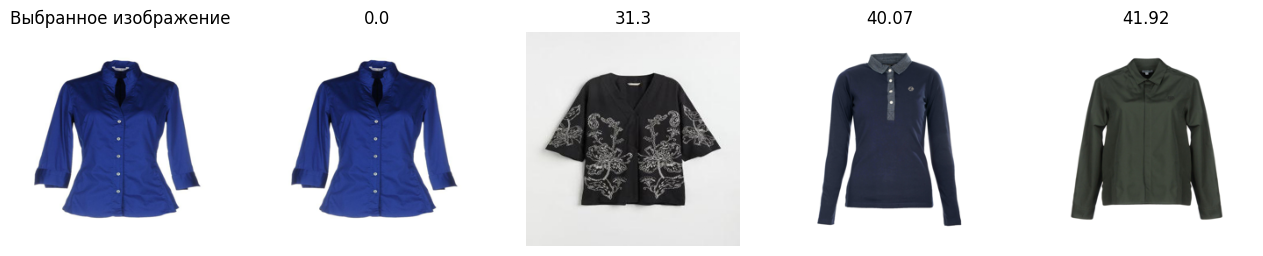

1/1 [==============================] - 0s 21ms/step


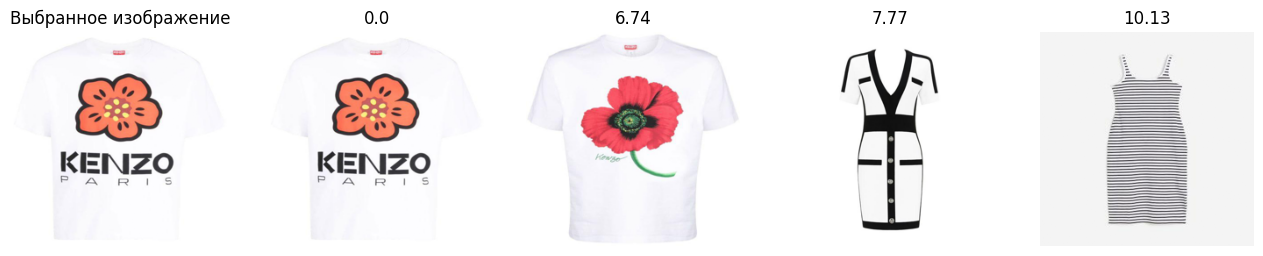

1/1 [==============================] - 0s 21ms/step


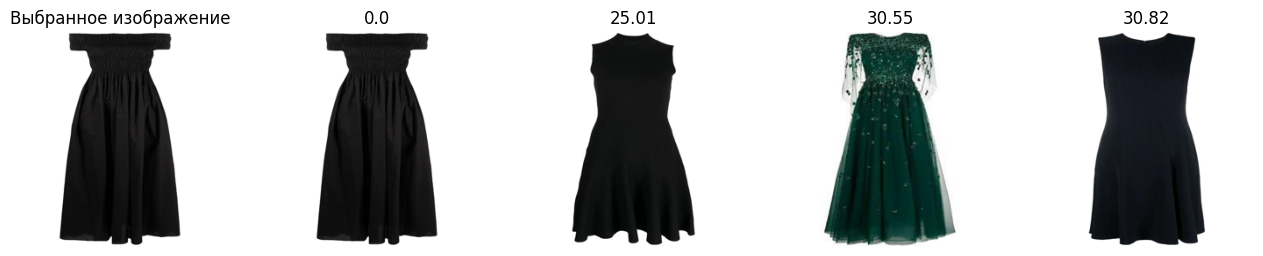

1/1 [==============================] - 0s 18ms/step


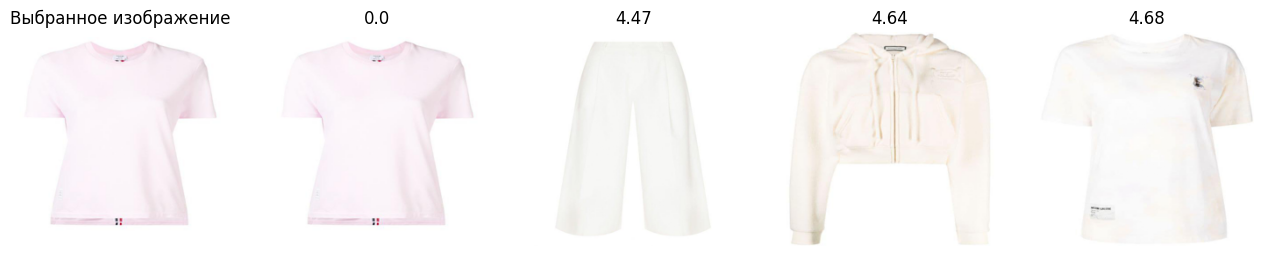

1/1 [==============================] - 0s 33ms/step


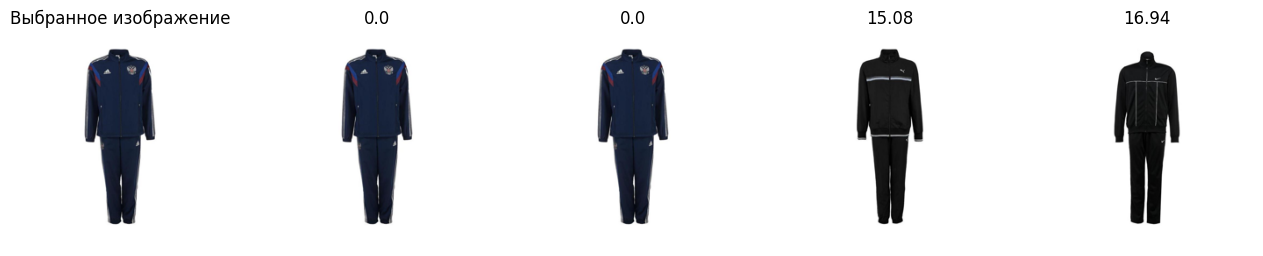

1/1 [==============================] - 0s 30ms/step


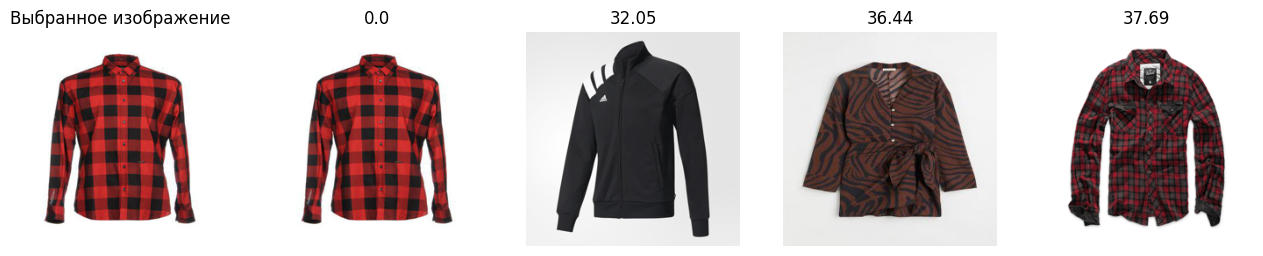

1/1 [==============================] - 0s 28ms/step


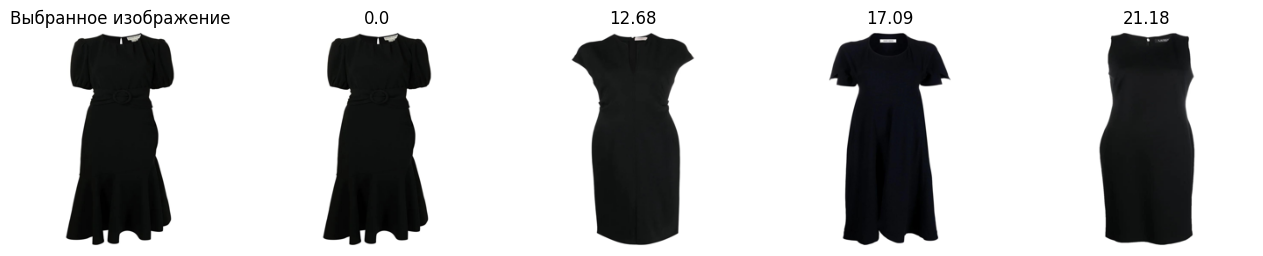

1/1 [==============================] - 0s 19ms/step


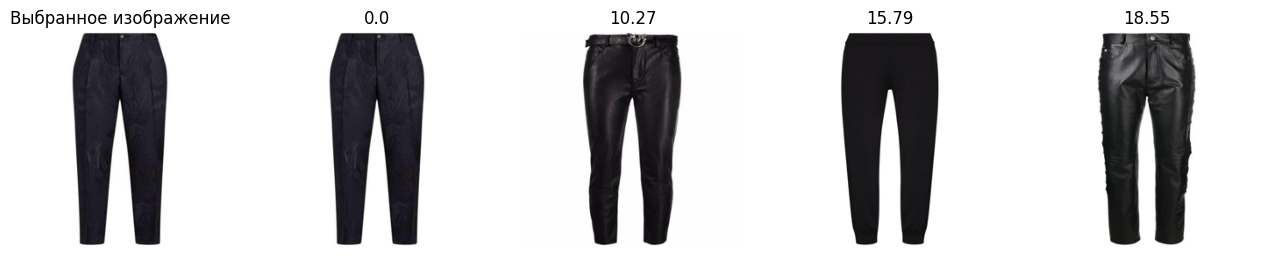

1/1 [==============================] - 0s 20ms/step


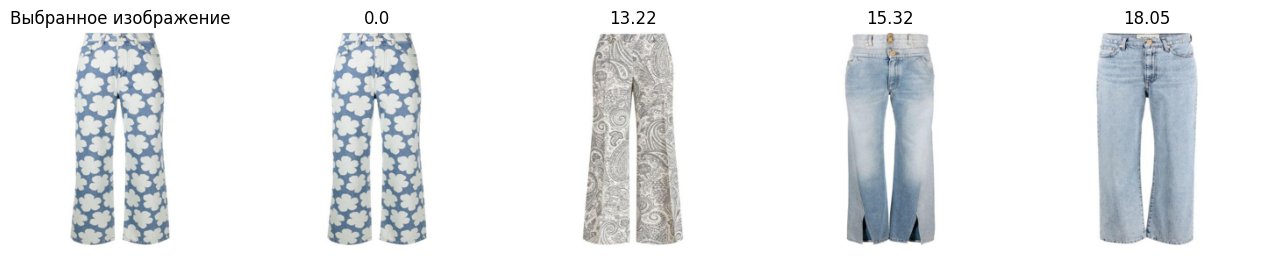

1/1 [==============================] - 0s 23ms/step


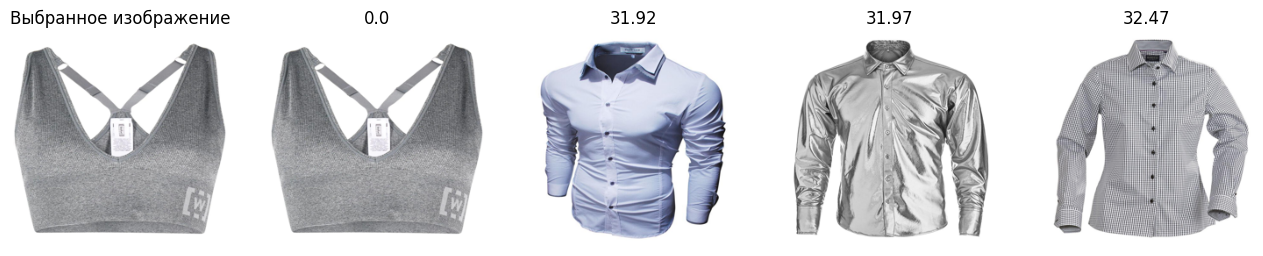

1/1 [==============================] - 0s 30ms/step


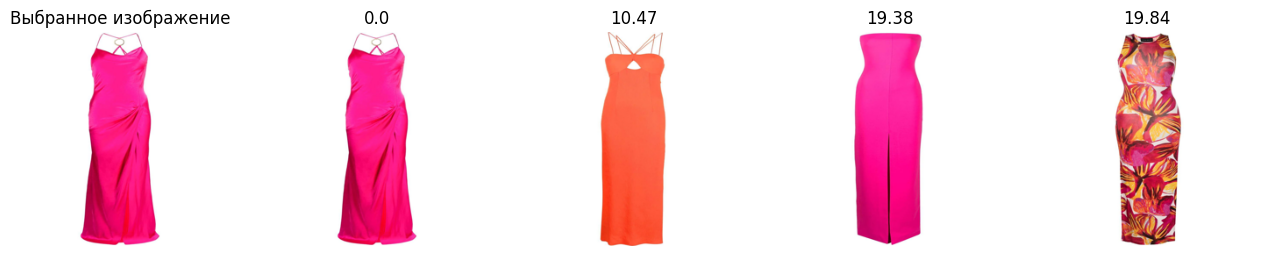

1/1 [==============================] - 0s 19ms/step


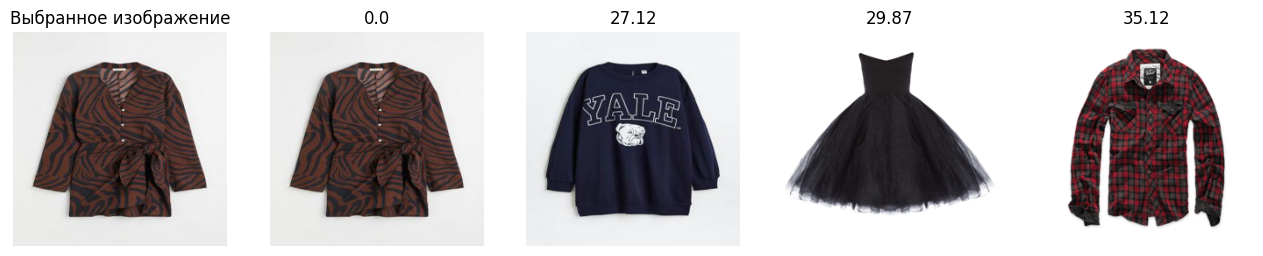

In [16]:
show_similar(1)
show_similar(51)
show_similar(101)
show_similar(151)
show_similar(201)
show_similar(251)
show_similar(301)
show_similar(351)
show_similar(401)
show_similar(451)
show_similar(501)
show_similar(551)